<a href="https://colab.research.google.com/github/luqmantalha/Data-Analysis-and-Visualization/blob/main/DAV_week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd


patients = pd.DataFrame({
    'patient_id': ['P01', 'P02', 'P03'],
    'name': ['John', 'Maya', 'Alice'],
    'age': [45, 30, 55],
    'gender': ['M', 'F', 'F']
})
patients.to_csv('patients.csv', index=False)

# Create treatments.csv
treatments = pd.DataFrame({
    'treatment_id': ['T101', 'T102', 'T103'],
    'patient_id': ['P01', 'P02', 'P01'],
    'treatment_type': ['Chemotherapy', 'Physiotherapy', 'Surgery'],
    'cost': [5000, 1500, 8000]
})
treatments.to_csv('treatments.csv', index=False)

# Create outcomes.csv
outcomes = pd.DataFrame({
    'treatment_id': ['T101', 'T102', 'T103'],
    'recovery_days': [30, 10, 60],
    'success': ['Yes', 'Yes', 'No']
})
outcomes.to_csv('outcomes.csv', index=False)


# Load the datasets
patients = pd.read_csv('patients.csv')
treatments = pd.read_csv('treatments.csv')
outcomes = pd.read_csv('outcomes.csv')

# Merge treatments with patients on 'patient_id'
merged1 = pd.merge(treatments, patients, on='patient_id')

# Merge the above result with outcomes on 'treatment_id'
final_merged = pd.merge(merged1, outcomes, on='treatment_id')

# Show the final merged dataset
print(final_merged)


  treatment_id patient_id treatment_type  cost  name  age gender  \
0         T101        P01   Chemotherapy  5000  John   45      M   
1         T102        P02  Physiotherapy  1500  Maya   30      F   
2         T103        P01        Surgery  8000  John   45      M   

   recovery_days success  
0             30     Yes  
1             10     Yes  
2             60      No  


In [4]:
# Convert 'success' to numeric: Yes = 1, No = 0
final_merged['success_numeric'] = final_merged['success'].map({'Yes': 1, 'No': 0})

# Group by treatment_type
grouped = final_merged.groupby('treatment_type').agg({
    'recovery_days': 'mean',
    'success_numeric': 'mean',
    'cost': 'mean'
}).reset_index()

# Rename for clarity
grouped.rename(columns={
    'recovery_days': 'avg_recovery_days',
    'success_numeric': 'success_rate',
    'cost': 'avg_cost'
}, inplace=True)

print("Grouped by treatment_type:")
print(grouped)
pivot = final_merged.pivot_table(
    index='name',           # Each patient
    columns='treatment_type',
    values='cost',
    aggfunc='sum',
    fill_value=0
)

print("\nPivot Table - Total Cost per Treatment Type per Patient:")
print(pivot)

Grouped by treatment_type:
  treatment_type  avg_recovery_days  success_rate  avg_cost
0   Chemotherapy               30.0           1.0    5000.0
1  Physiotherapy               10.0           1.0    1500.0
2        Surgery               60.0           0.0    8000.0

Pivot Table - Total Cost per Treatment Type per Patient:
treatment_type  Chemotherapy  Physiotherapy  Surgery
name                                                
John                    5000              0     8000
Maya                       0           1500        0


In [5]:
highest_avg_cost = grouped.loc[grouped['avg_cost'].idxmax()]
print(f"\nTreatment with highest average cost: {highest_avg_cost['treatment_type']} (${highest_avg_cost['avg_cost']})")


Treatment with highest average cost: Surgery ($8000.0)


In [6]:
longest_recovery = final_merged.loc[final_merged['recovery_days'].idxmax()]
print(f"\nPatient with longest recovery: {longest_recovery['name']} ({longest_recovery['recovery_days']} days)")


Patient with longest recovery: John (60 days)


In [7]:
success_by_gender = final_merged.groupby('gender')['success_numeric'].mean().reset_index()
success_by_gender.rename(columns={'success_numeric': 'success_rate'}, inplace=True)

print("\nSuccess Rate by Gender:")
print(success_by_gender)


Success Rate by Gender:
  gender  success_rate
0      F           1.0
1      M           0.5


/tmp/ipython-input-1206229507.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='treatment_type', y='avg_recovery_days', data=grouped, palette='Blues_d')


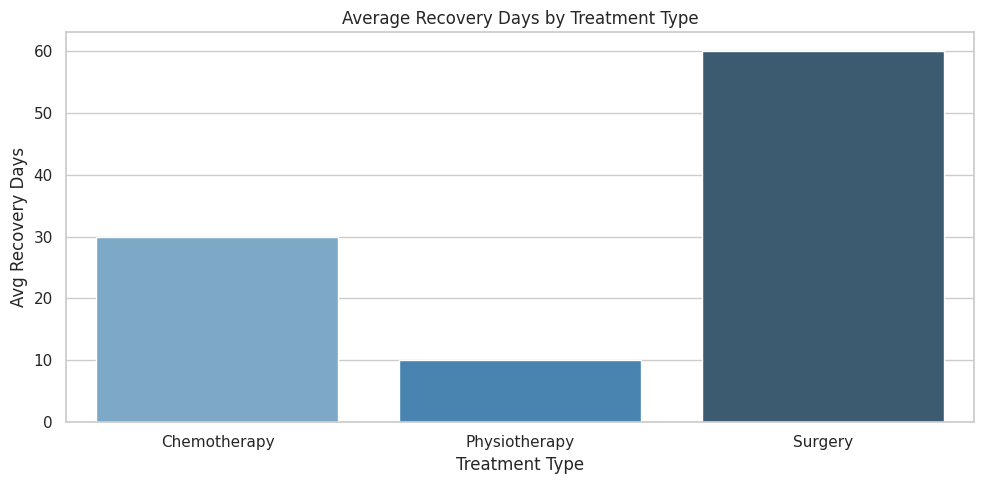

/tmp/ipython-input-1206229507.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='treatment_type', y='success_rate', data=grouped, palette='Greens_d')


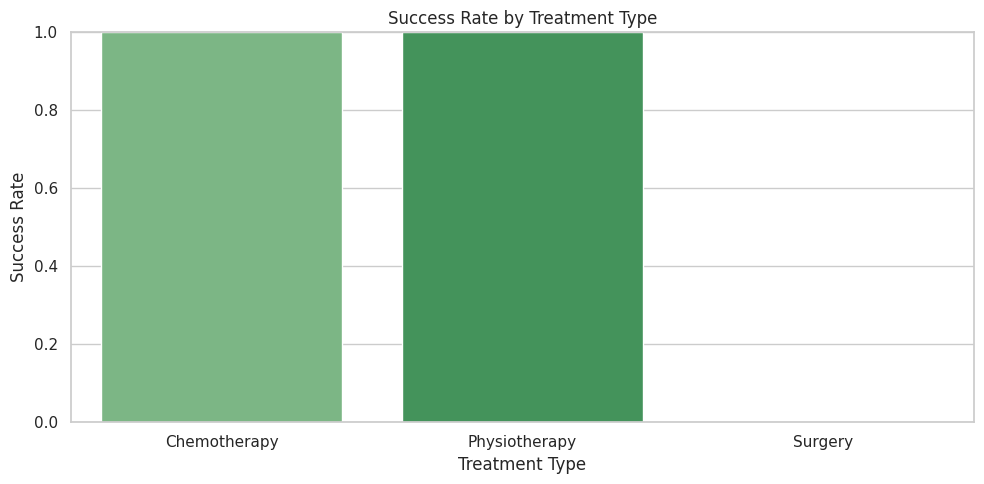

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Group data (from earlier)
grouped = final_merged.copy()
grouped['success_numeric'] = grouped['success'].map({'Yes': 1, 'No': 0})
grouped = grouped.groupby('treatment_type').agg({
    'recovery_days': 'mean',
    'success_numeric': 'mean',
    'cost': 'mean'
}).reset_index()
grouped.rename(columns={'recovery_days': 'avg_recovery_days', 'success_numeric': 'success_rate', 'cost': 'avg_cost'}, inplace=True)

# Plot average recovery days
plt.figure(figsize=(10, 5))
sns.barplot(x='treatment_type', y='avg_recovery_days', data=grouped, palette='Blues_d')
plt.title('Average Recovery Days by Treatment Type')
plt.ylabel('Avg Recovery Days')
plt.xlabel('Treatment Type')
plt.tight_layout()
plt.show()

# Plot success rate
plt.figure(figsize=(10, 5))
sns.barplot(x='treatment_type', y='success_rate', data=grouped, palette='Greens_d')
plt.title('Success Rate by Treatment Type')
plt.ylabel('Success Rate')
plt.xlabel('Treatment Type')
plt.ylim(0, 1)  # Success rate between 0 and 1
plt.tight_layout()
plt.show()

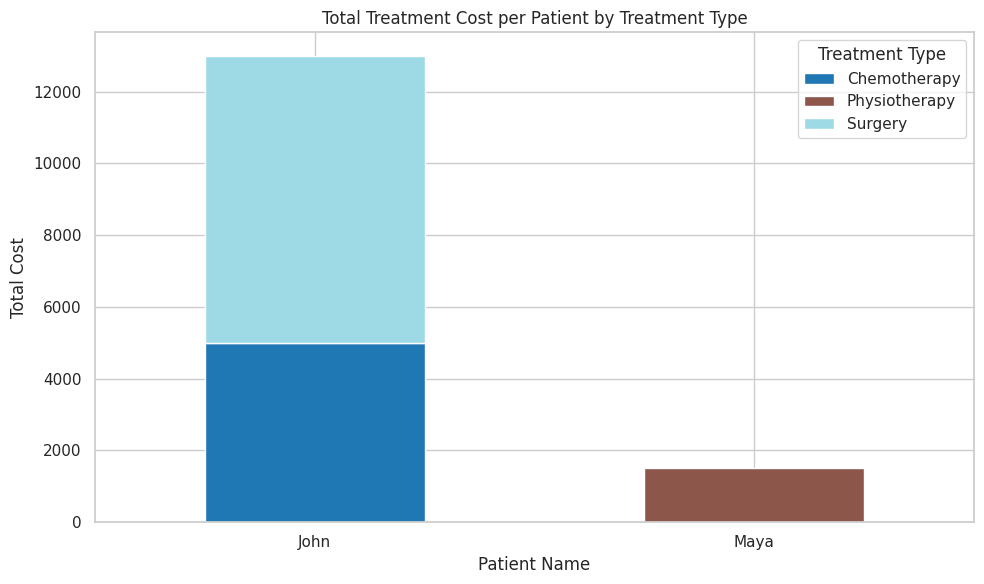

In [9]:
# Create pivot table again
pivot = final_merged.pivot_table(
    index='name',
    columns='treatment_type',
    values='cost',
    aggfunc='sum',
    fill_value=0
)

# Plot stacked bar chart
pivot.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')
plt.title('Total Treatment Cost per Patient by Treatment Type')
plt.ylabel('Total Cost')
plt.xlabel('Patient Name')
plt.xticks(rotation=0)
plt.legend(title='Treatment Type')
plt.tight_layout()
plt.show()